In [ ]:
import pandas as pd

In [ ]:
db = pd.read_csv("https://raw.githubusercontent.com/andresramirez31/EntregableIModelosII/main/BaseDeDatos/E3_database.csv")


In [ ]:
# prompt: Normalizame los datos de db

from sklearn.preprocessing import MinMaxScaler

# Inicializa el escalador
scaler = MinMaxScaler()

# Selecciona las columnas numéricas que quieres normalizar
columnas_a_normalizar = ['EDAD', 'EDUCACION', 'INGRESOS']  # Reemplaza con los nombres de tus columnas

# Ajusta el escalador a los datos y transforma las columnas seleccionadas
db = scaler.fit_transform(db)

db


array([[0.        , 0.        , 0.        , ..., 0.00307006, 0.01249807,
        0.11085997],
       [0.        , 0.        , 0.        , ..., 0.00195424, 0.02013174,
        0.10448173],
       [0.        , 0.        , 0.        , ..., 0.00180354, 0.03060921,
        0.10807212],
       ...,
       [0.20512821, 1.        , 1.        , ..., 0.00412937, 0.04408022,
        0.0138971 ],
       [0.20512821, 1.        , 1.        , ..., 0.00446601, 0.04018857,
        0.01651601],
       [0.20512821, 1.        , 1.        , ..., 0.00559476, 0.04011375,
        0.01596688]])

In [ ]:
db.dtypes

,0
Id,int64
Class,int64
relabeledClassArray,int64
Finger_1,float64
Finger_2,float64
...,...
WL_8,float64
WL_9,float64
WL_10,float64
WL_11,float64


In [ ]:
print(db.isna().sum())

Id                     0
Class                  0
relabeledClassArray    0
Finger_1               0
Finger_2               0
                      ..
WL_8                   0
WL_9                   0
WL_10                  0
WL_11                  0
WL_12                  0
Length: 69, dtype: int64


Analisis de valores NA.

In [ ]:
print(db.isnull().sum())

Id                     0
Class                  0
relabeledClassArray    0
Finger_1               0
Finger_2               0
                      ..
WL_8                   0
WL_9                   0
WL_10                  0
WL_11                  0
WL_12                  0
Length: 69, dtype: int64


Analisis de valores nulos

In [ ]:
for column in db.columns[(db == 0).any()]:
  print(column)

Class
relabeledClassArray
Finger_1
Finger_2
Finger_3
Finger_4
Finger_6
ZC_1
ZC_2
ZC_3
ZC_4
ZC_5
ZC_6
ZC_7
ZC_8
ZC_9
ZC_10
ZC_11
ZC_12
SSC_1
SSC_2
SSC_3
SSC_4
SSC_5
SSC_6
SSC_7
SSC_8
SSC_9
SSC_10
SSC_11
SSC_12


In [ ]:
selected_columns = ['Id', 'Class', 'relabeledClassArray','Finger_4']  # Explicit column names
mav_to_wl_columns = list(db.loc[:, 'MAVs_1':'WL_12'].columns)  # Slice the MAVs_1 to WL_12 columns
selected_columns.extend(mav_to_wl_columns)  # Combine all selected columns
condition = db['relabeledClassArray'].isin([0,5,6,7])
dbF5 = db.loc[condition, selected_columns]
dbF5


,Id,Class,relabeledClassArray,Finger_4,MAVs_1,MAVs_2,MAVs_3,MAVs_4,MAVs_5,MAVs_6,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
0,1,0,0,1.592324,0.000008,0.000007,0.000003,0.000004,0.000003,0.000002,...,0.000313,0.000240,0.000269,0.000285,0.000301,0.000419,0.000293,0.000274,0.000194,0.001056
1,1,0,0,1.514740,0.000008,0.000006,0.000002,0.000005,0.000002,0.000003,...,0.000267,0.000330,0.000263,0.000255,0.000315,0.000366,0.000349,0.000236,0.000211,0.001006
2,1,0,0,1.553051,0.000005,0.000004,0.000002,0.000003,0.000002,0.000002,...,0.000268,0.000265,0.000220,0.000227,0.000284,0.000311,0.000343,0.000231,0.000234,0.001034
3,1,0,0,1.543784,0.000008,0.000008,0.000003,0.000005,0.000003,0.000002,...,0.000325,0.000302,0.000231,0.000243,0.000258,0.000373,0.000393,0.000270,0.000194,0.001459
4,1,0,0,1.543410,0.000014,0.000011,0.000005,0.000005,0.000002,0.000002,...,0.000424,0.000338,0.000298,0.000281,0.000317,0.000441,0.000445,0.000276,0.000250,0.001533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170676,9,0,0,0.752816,0.000005,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000227,0.000196,0.000207,0.000200,0.000623,0.000498,0.000235,0.000298,0.000258,0.000279
170677,9,0,0,0.764661,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000227,0.000183,0.000221,0.000218,0.000589,0.000463,0.000233,0.000292,0.000247,0.000261
170678,9,0,0,0.733441,0.000003,0.000002,0.000002,0.000002,0.000002,0.000003,...,0.000254,0.000221,0.000204,0.000276,0.000517,0.000505,0.000240,0.000287,0.000259,0.000238
170679,9,0,0,0.771022,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,...,0.000189,0.000207,0.000233,0.000224,0.000698,0.000533,0.000219,0.000356,0.000261,0.000315


In [ ]:
dbF5_filtered2 = dbF5.loc[dbF5['Finger_4'] > 30]
dbF5_filtered2

,Id,Class,relabeledClassArray,Finger_4,MAVs_1,MAVs_2,MAVs_3,MAVs_4,MAVs_5,MAVs_6,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
131086,37,47,6,30.00842,0.000038,0.000038,0.000044,0.000006,0.000006,0.000012,...,0.002286,0.000414,0.000416,0.000678,0.002004,0.004945,0.000851,0.001063,0.000290,0.000340
131087,37,47,6,30.79403,0.000041,0.000044,0.000036,0.000007,0.000007,0.000014,...,0.002163,0.000499,0.000464,0.000775,0.001576,0.005018,0.001047,0.000954,0.000286,0.000360
131088,37,47,6,33.63259,0.000039,0.000061,0.000040,0.000008,0.000008,0.000020,...,0.002438,0.000511,0.000418,0.000738,0.001941,0.004709,0.001100,0.001334,0.000322,0.000385
131089,37,47,6,36.61590,0.000043,0.000056,0.000033,0.000007,0.000009,0.000017,...,0.002147,0.000513,0.000525,0.000820,0.001574,0.006245,0.001189,0.002757,0.000313,0.000368
131090,37,47,6,34.09714,0.000053,0.000044,0.000047,0.000008,0.000008,0.000021,...,0.002816,0.000543,0.000453,0.000934,0.001676,0.004648,0.001108,0.002190,0.000283,0.000355
131167,37,47,6,31.15234,0.000054,0.000045,0.000040,0.000007,0.000007,0.000013,...,0.002805,0.000480,0.000551,0.000693,0.000897,0.006268,0.001263,0.000838,0.000326,0.000401
131168,37,47,6,30.05835,0.000055,0.000034,0.000038,0.000007,0.000008,0.000013,...,0.002195,0.000497,0.000535,0.000722,0.000741,0.006786,0.001152,0.000965,0.000326,0.000359
131172,37,47,6,31.99118,0.000069,0.000040,0.000041,0.000008,0.000007,0.000013,...,0.002903,0.000506,0.000459,0.000677,0.000821,0.006211,0.001106,0.000903,0.000336,0.000382
131173,37,47,6,32.35639,0.000049,0.000047,0.000052,0.000009,0.000009,0.000014,...,0.003470,0.000563,0.000477,0.000750,0.001059,0.007305,0.001097,0.000731,0.000352,0.000446
131174,37,47,6,33.32408,0.000049,0.000066,0.000044,0.000009,0.000008,0.000015,...,0.003752,0.000539,0.000574,0.000694,0.000907,0.006466,0.001431,0.000841,0.000310,0.000407


In [ ]:
# prompt: traverse row-wise the database dbF5 and remove the rows that contain a 0 in their columns
dbF5_filtered = dbF5.loc[1:50,'ZC_1':'SSC_12']
dbF5_filtered = dbF5_filtered.loc[(dbF5_filtered == 0).any(axis=1)]
dbF5_filtered


,ZC_1,ZC_2,ZC_3,ZC_4,ZC_5,ZC_6,ZC_7,ZC_8,ZC_9,ZC_10,...,SSC_3,SSC_4,SSC_5,SSC_6,SSC_7,SSC_8,SSC_9,SSC_10,SSC_11,SSC_12
1,9,6,0,4,0,0,0,1,3,0,...,0,2,0,0,0,0,1,0,0,9
2,8,3,0,1,0,0,0,0,3,0,...,0,0,0,0,0,0,1,0,0,8
3,8,6,0,4,0,0,0,2,2,0,...,0,1,0,0,0,0,1,0,0,13
4,13,10,5,5,0,0,0,5,3,0,...,0,1,0,0,0,1,2,0,0,11
5,14,10,5,7,0,0,5,4,5,2,...,5,6,0,0,3,1,6,2,0,9
6,20,24,14,17,5,3,8,14,11,14,...,13,12,0,0,7,14,11,12,0,21
7,18,13,14,18,8,1,5,11,17,5,...,15,25,0,0,4,10,28,3,0,23
8,19,14,23,20,8,0,8,19,21,10,...,26,22,0,0,9,27,21,16,0,21
9,15,21,17,17,2,1,10,17,22,12,...,19,15,0,0,11,26,25,14,0,19
10,18,25,17,22,8,3,13,18,21,16,...,20,24,2,0,13,25,22,16,0,22


In [ ]:
dbF5_Zero = dbF5.loc[:,['SSC_6','SSC_11']]
dbF5_Zero


,SSC_6,SSC_11
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
170676,0,0
170677,0,0
170678,0,0
170679,0,0


In [ ]:
dbF5_Zero[(dbF5_Zero != 0).all(axis=1)]

,SSC_6,SSC_11
6938,1,1
7884,2,1
19589,9,7
19590,10,1
19591,11,3
...,...,...
164788,1,1
165032,1,1
165100,11,1
165190,1,1


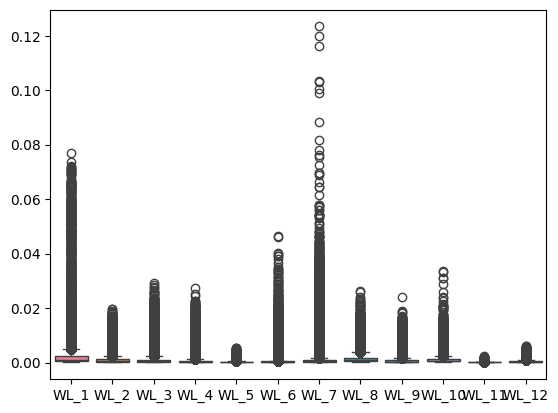

In [ ]:
# prompt: hazme un diagrama de cajas de bigotes

import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que quieres un diagrama de cajas y bigotes para todas las columnas numéricas en dbF5:
sns.boxplot(data=dbF5.loc[:,'WL_1':'WL_12'])
plt.xticks()  # Rotar etiquetas del eje x si hay muchas columnas
plt.show()


In [ ]:
import matplotlib.pyplot as plt


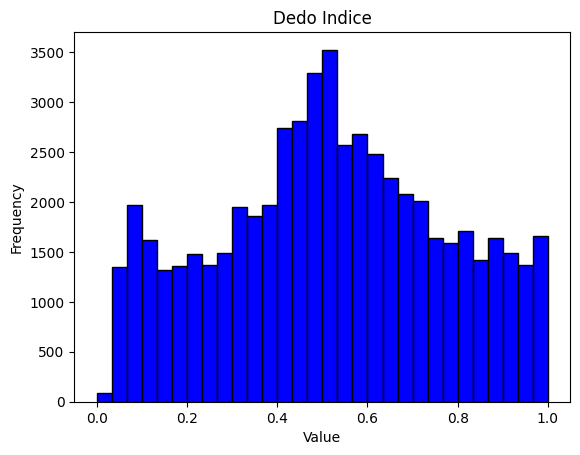

In [ ]:
plt.hist(dbF5['Finger_4'], bins=30, color='blue', edgecolor='black', range=(0,1))
plt.title('Dedo Indice')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

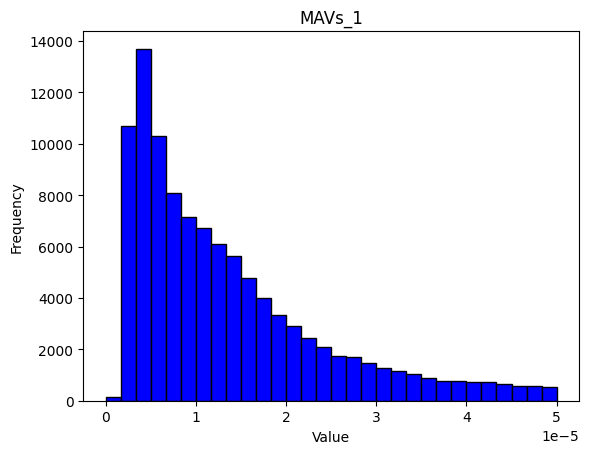

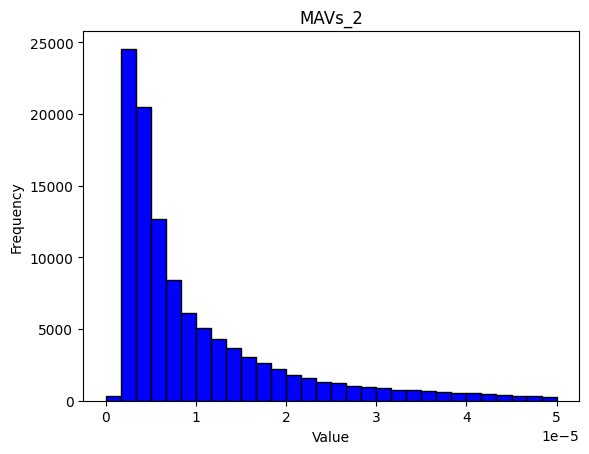

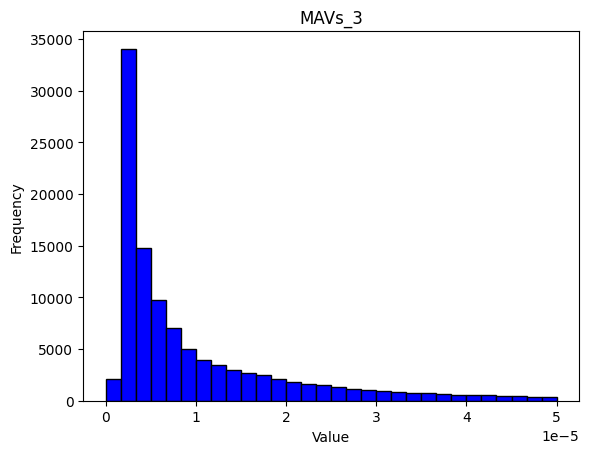

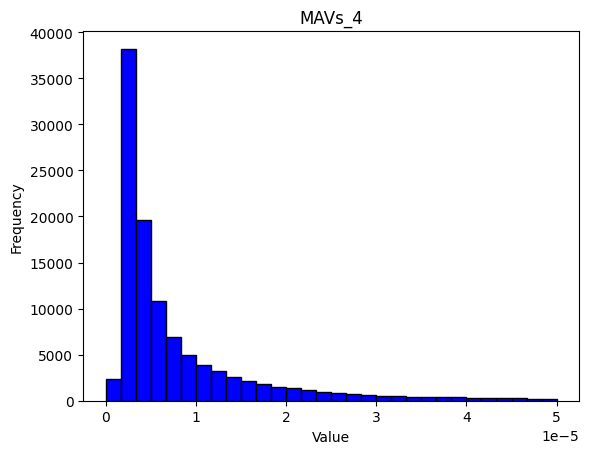

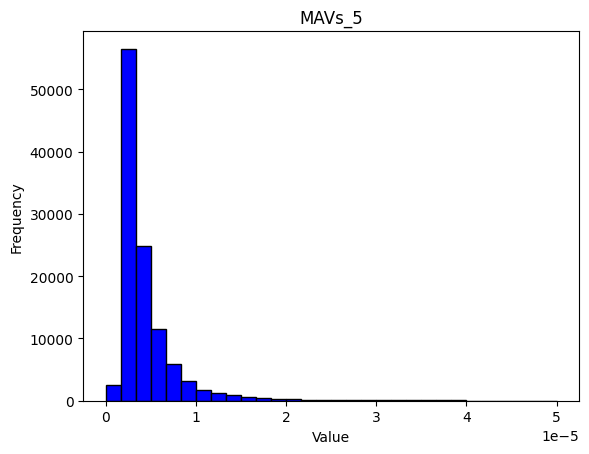

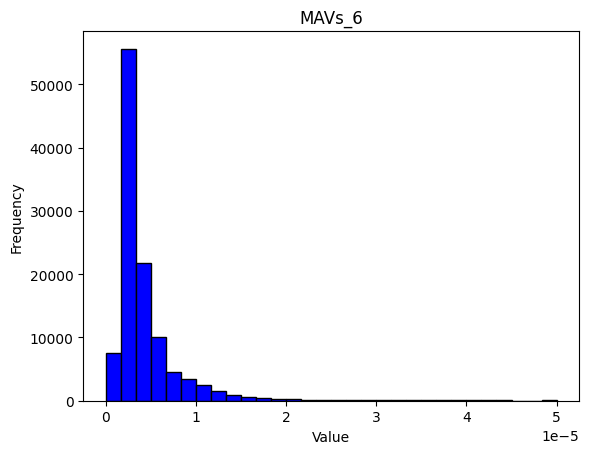

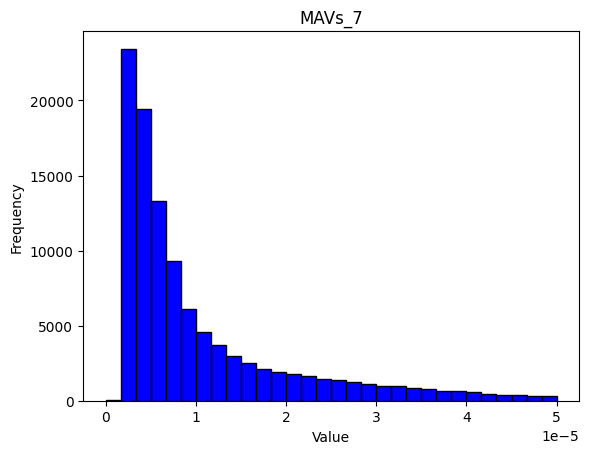

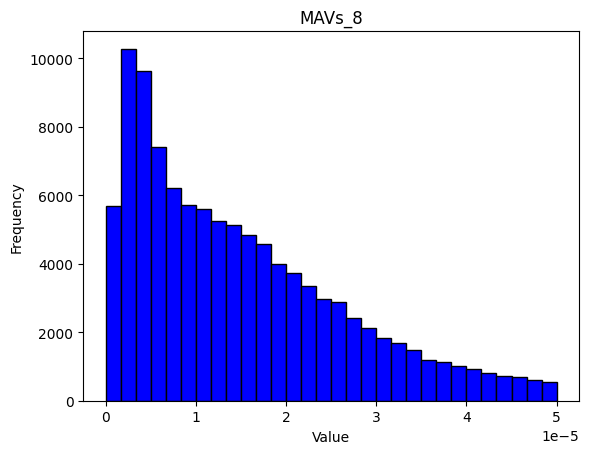

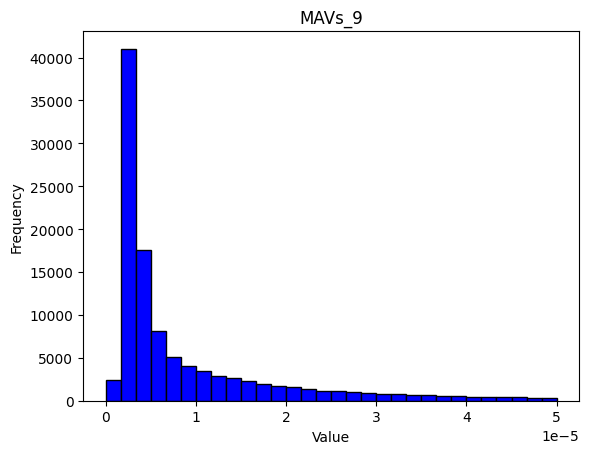

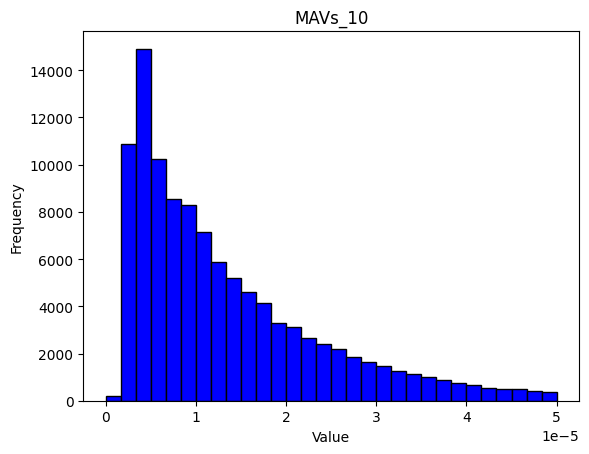

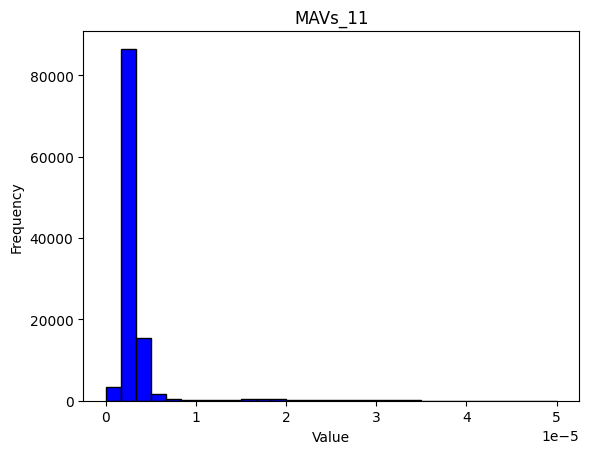

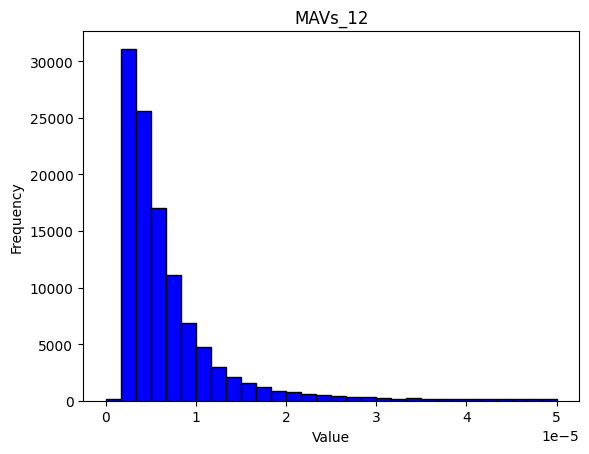

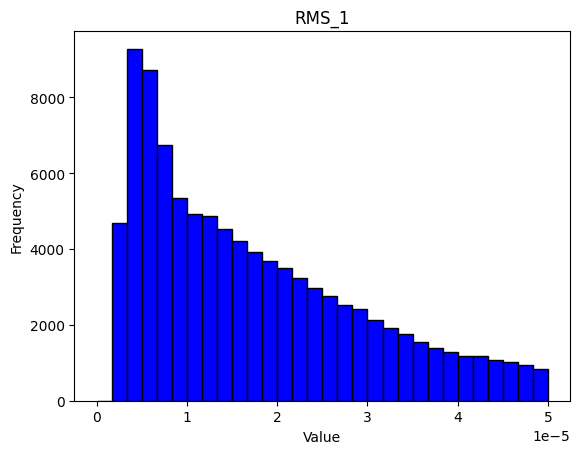

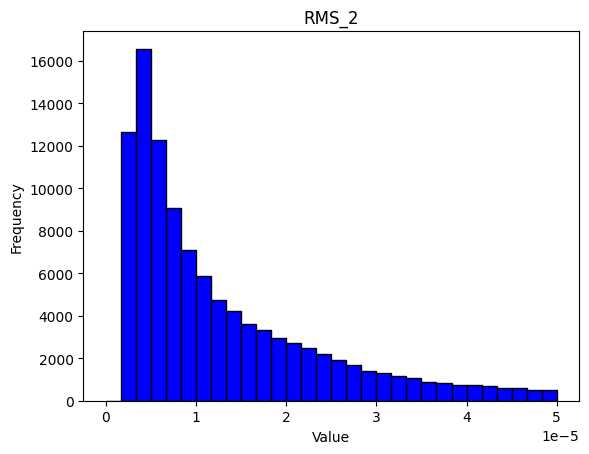

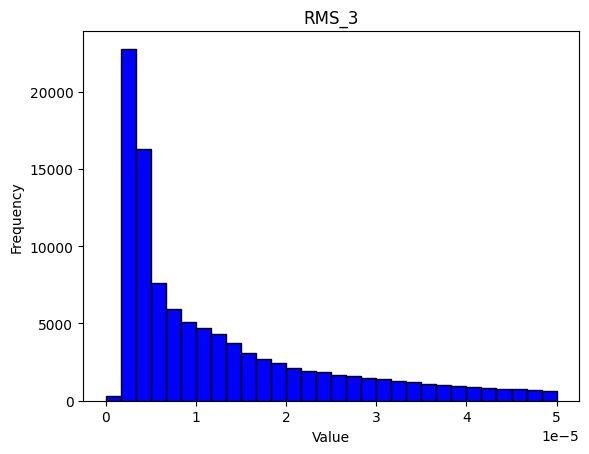

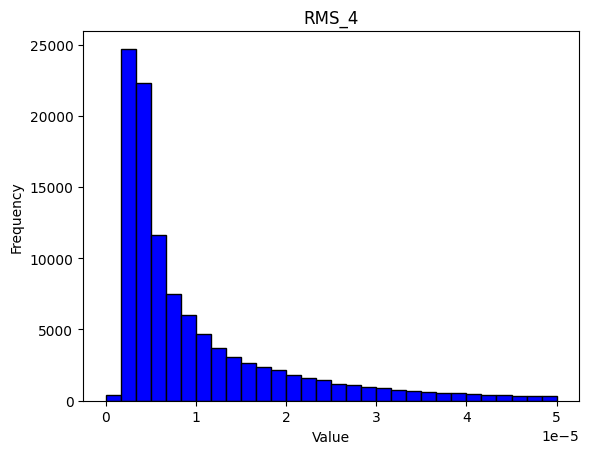

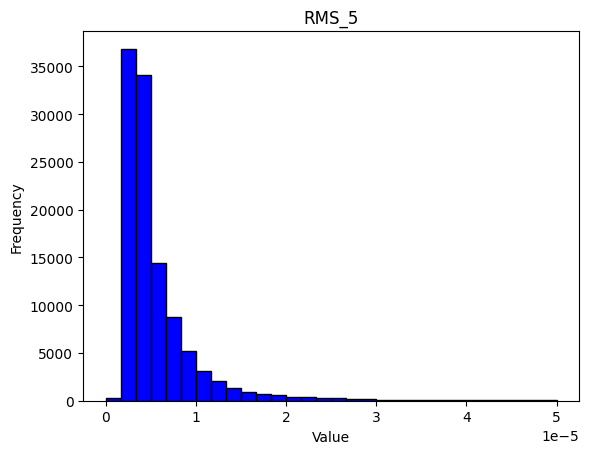

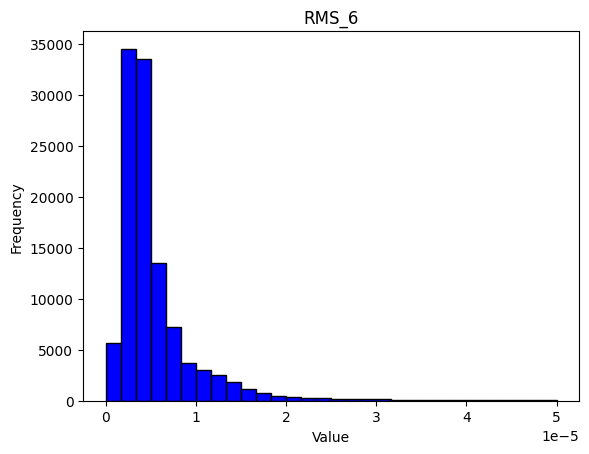

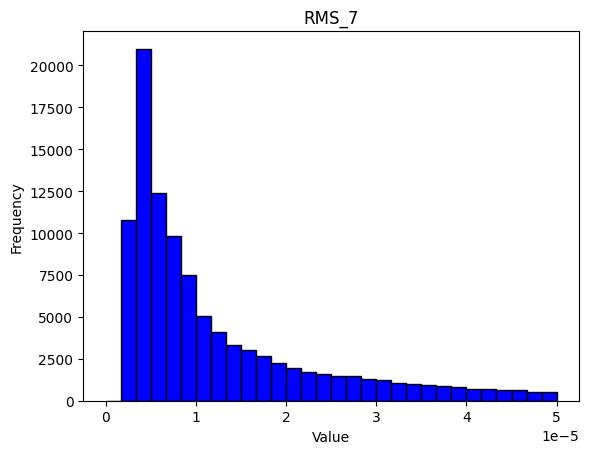

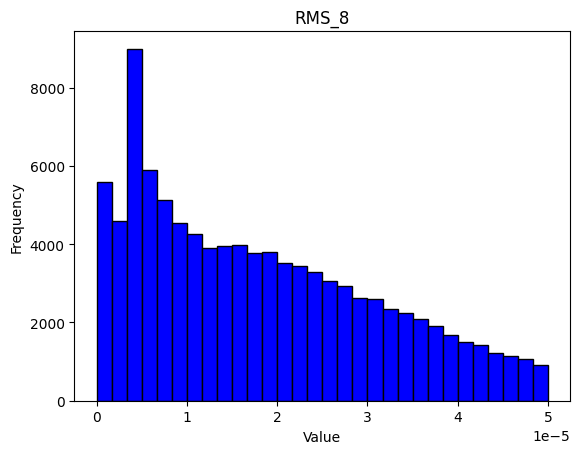

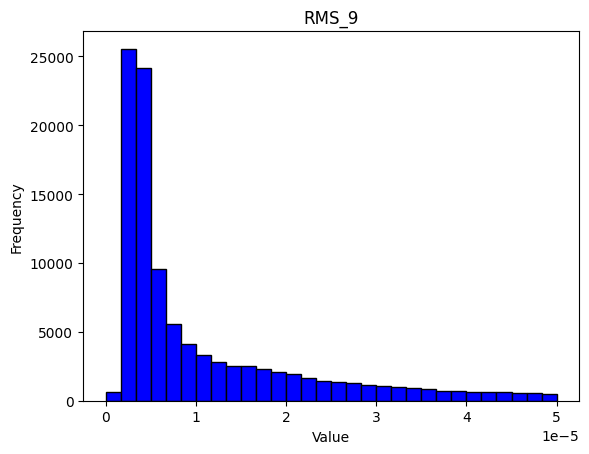

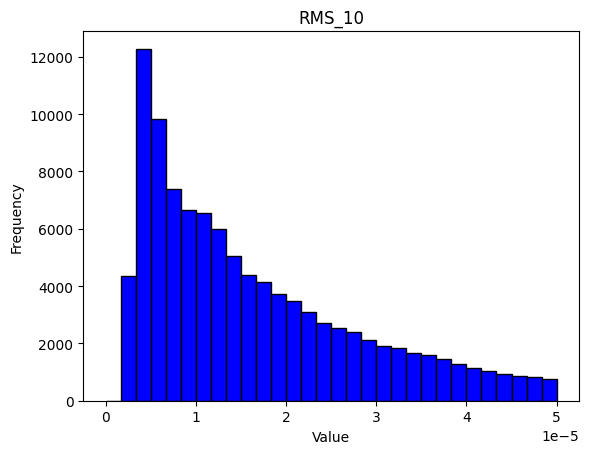

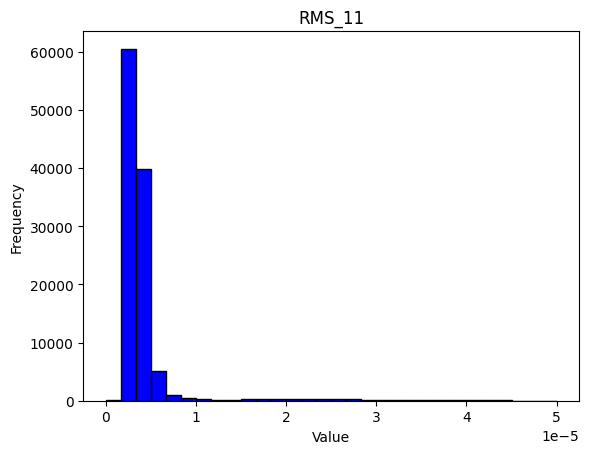

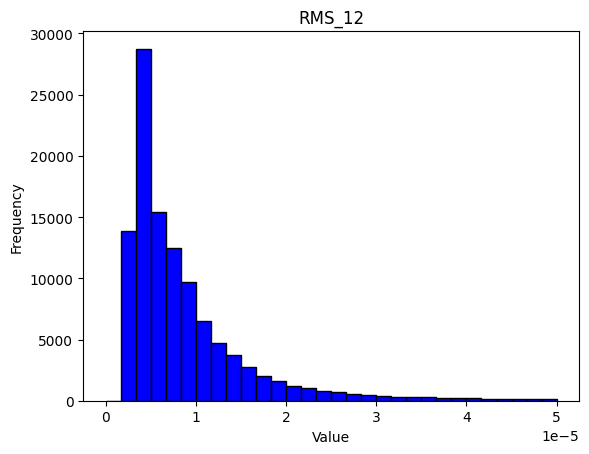

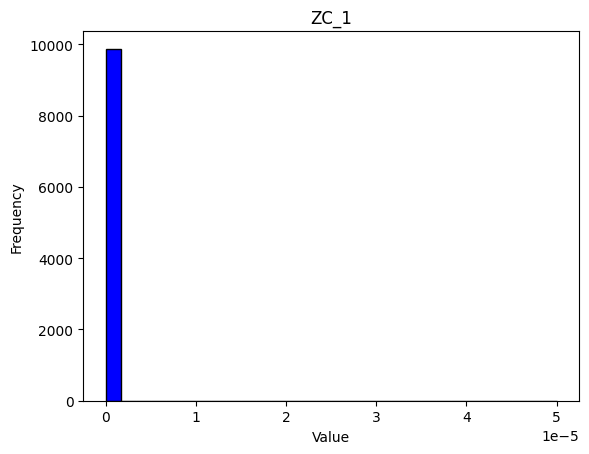

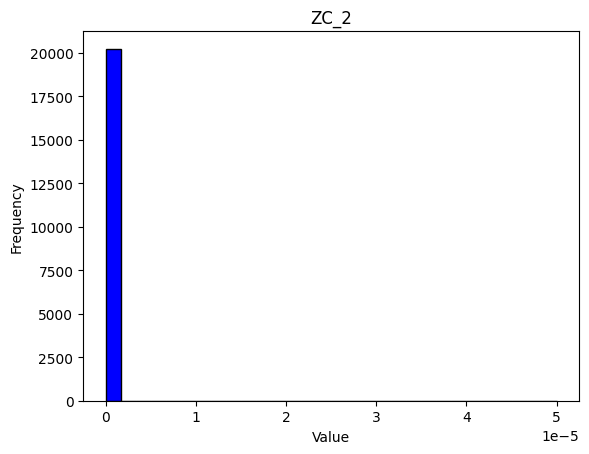

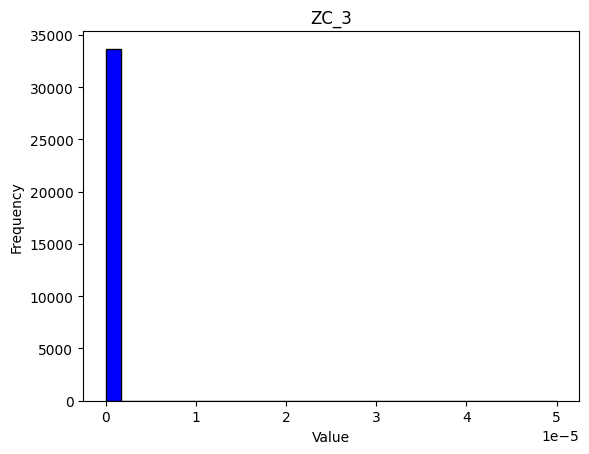

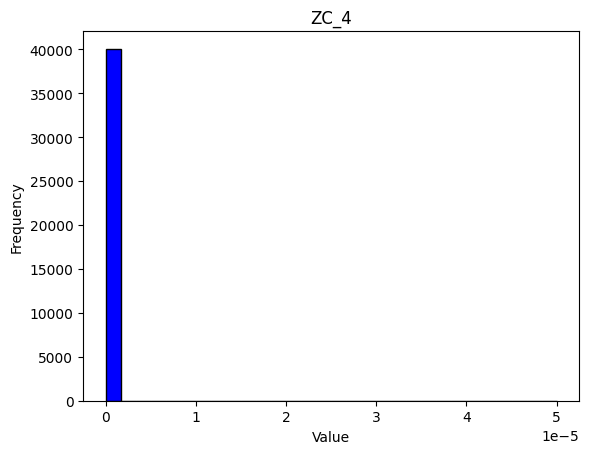

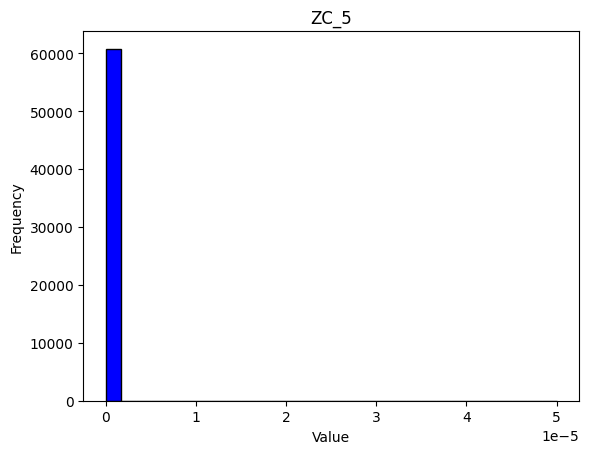

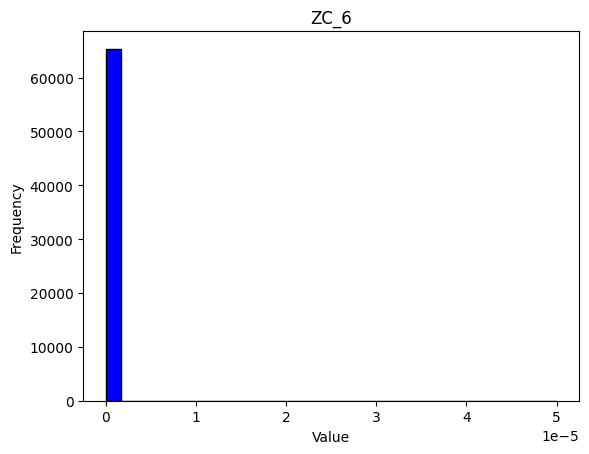

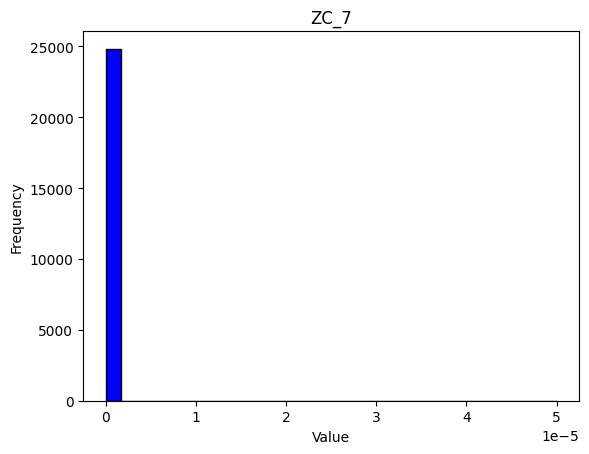

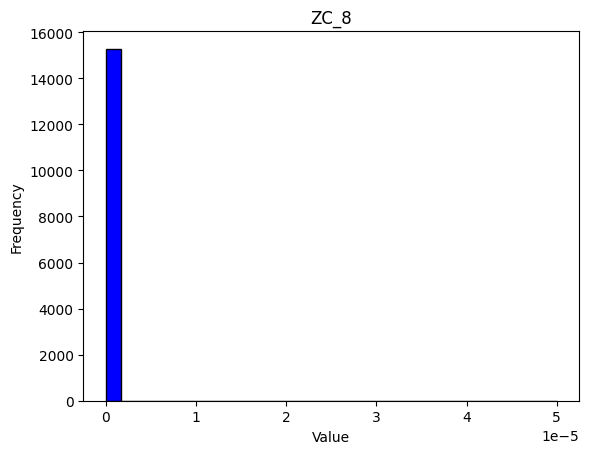

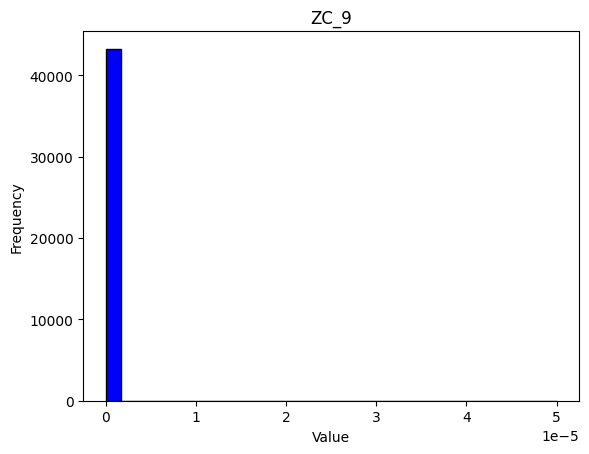

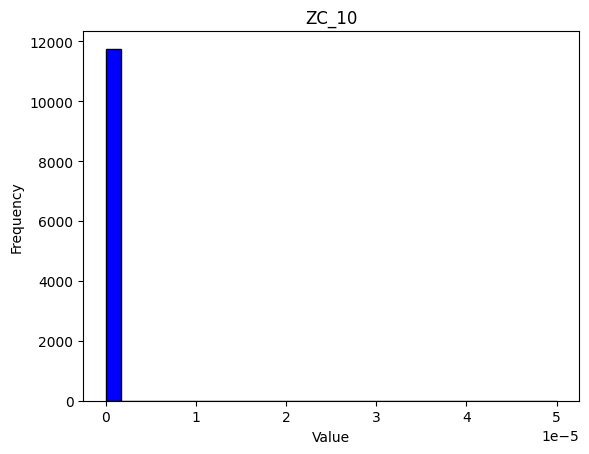

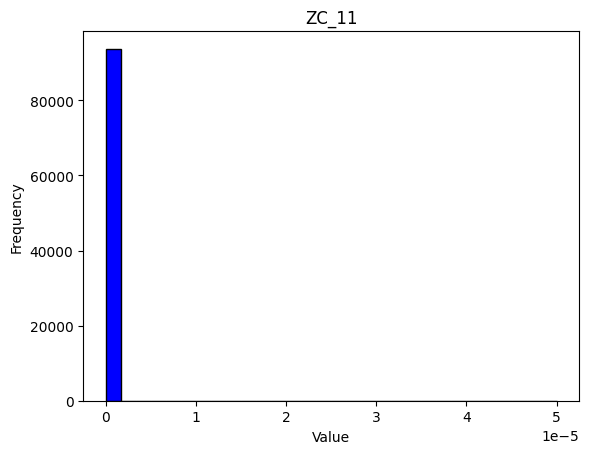

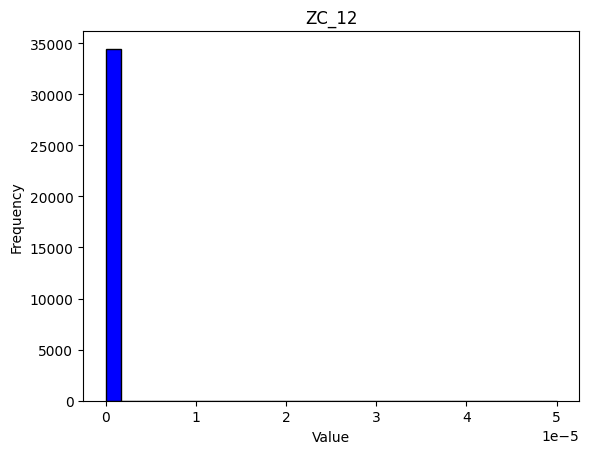

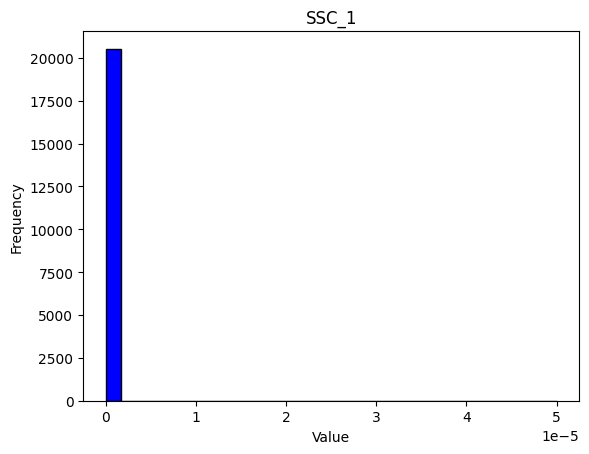

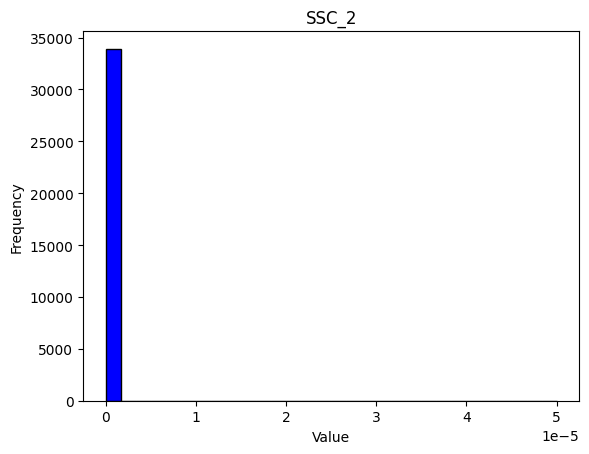

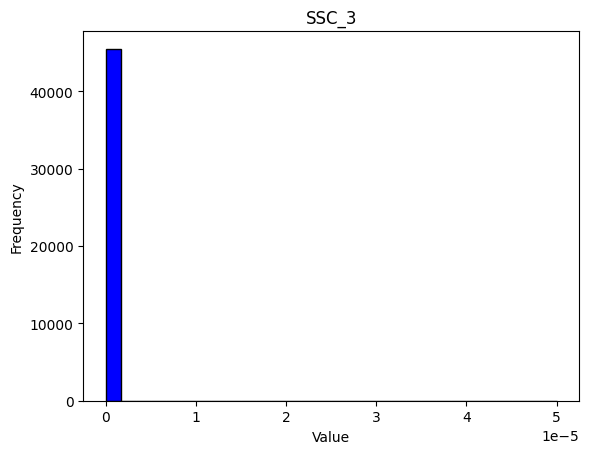

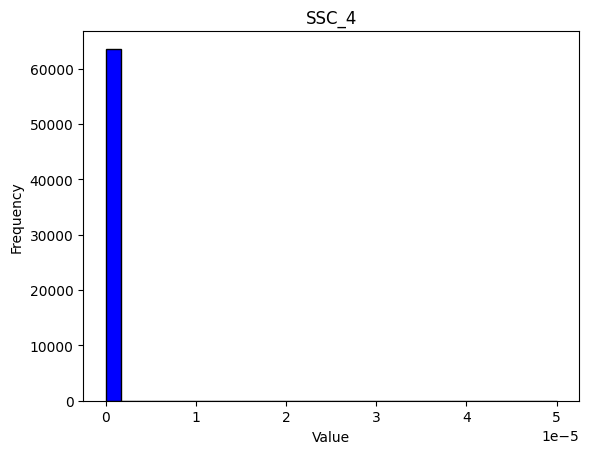

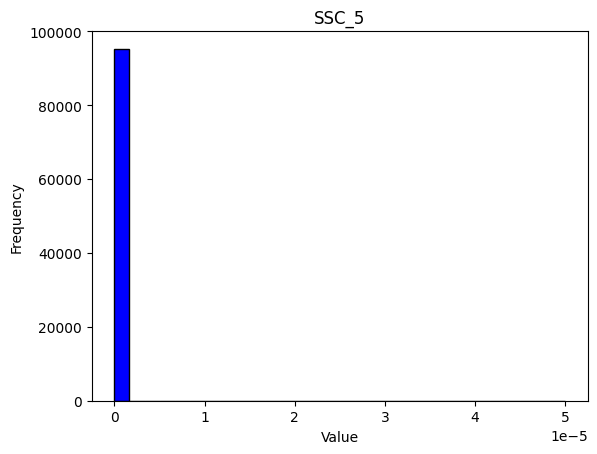

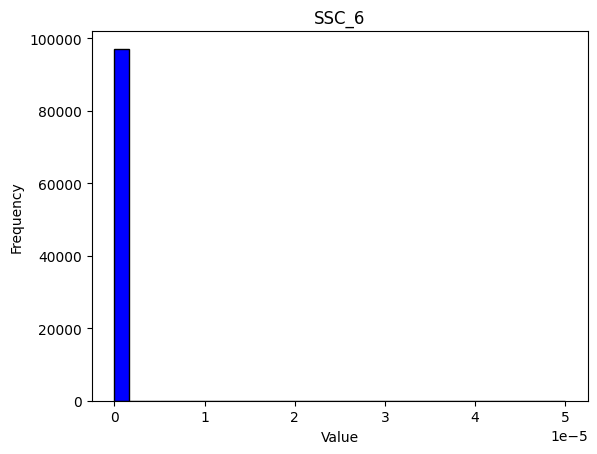

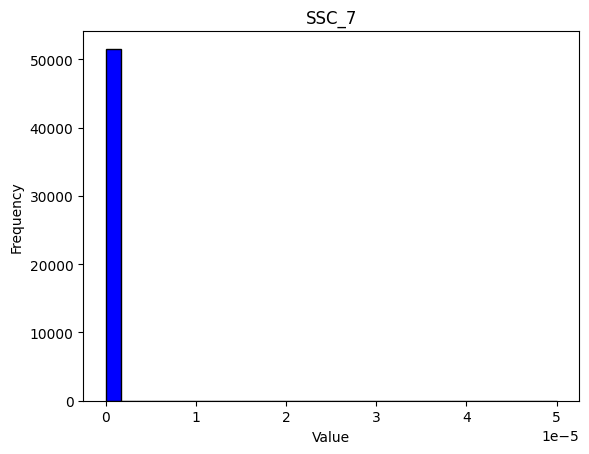

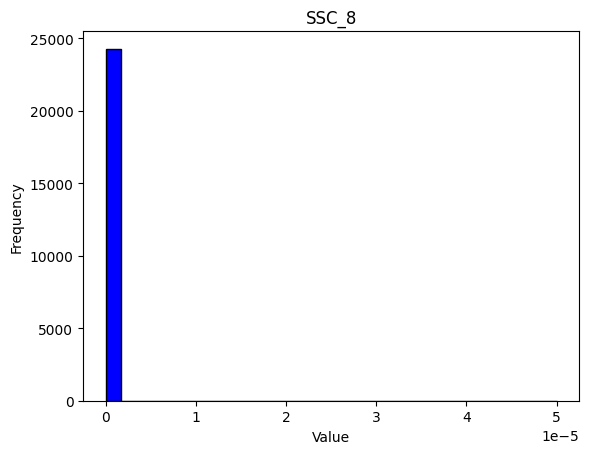

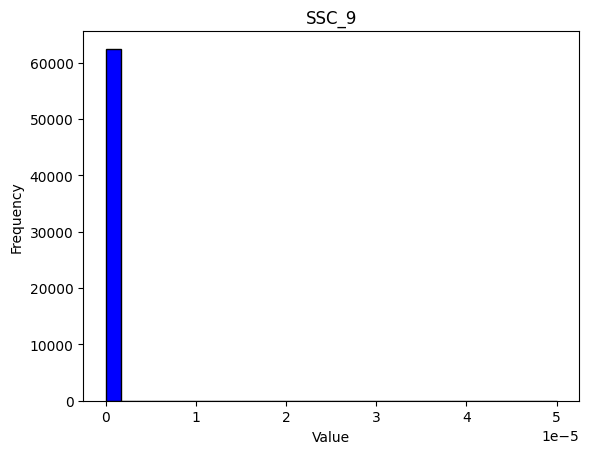

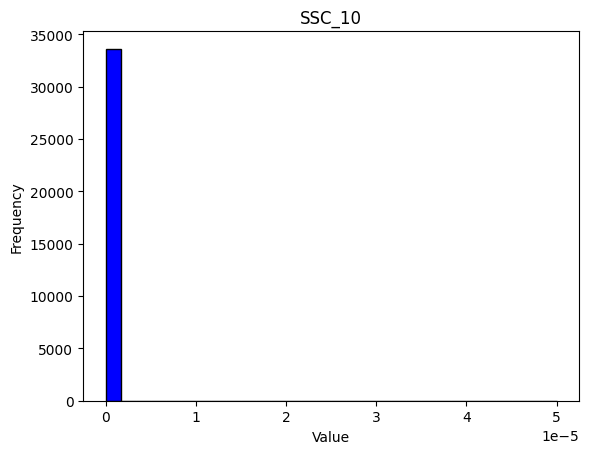

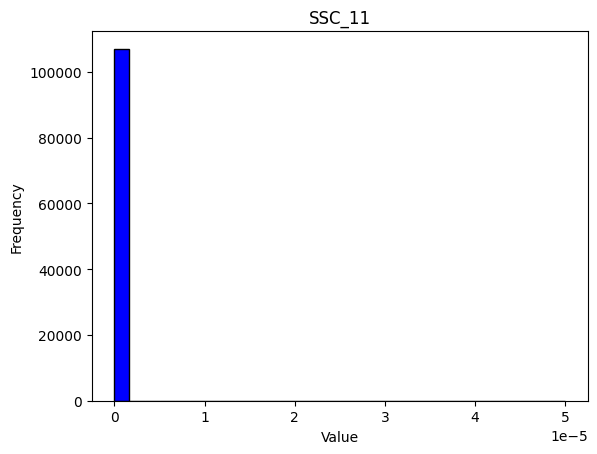

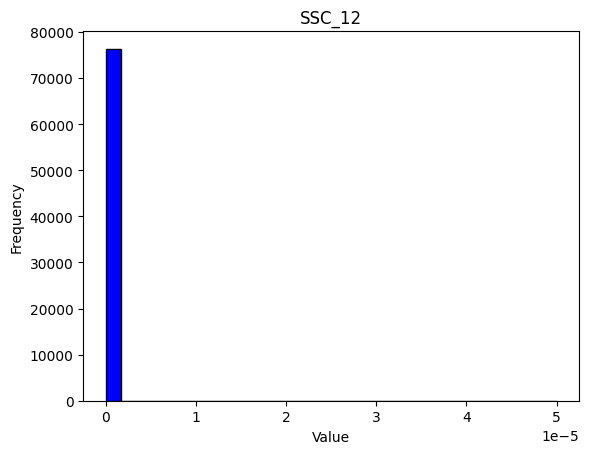

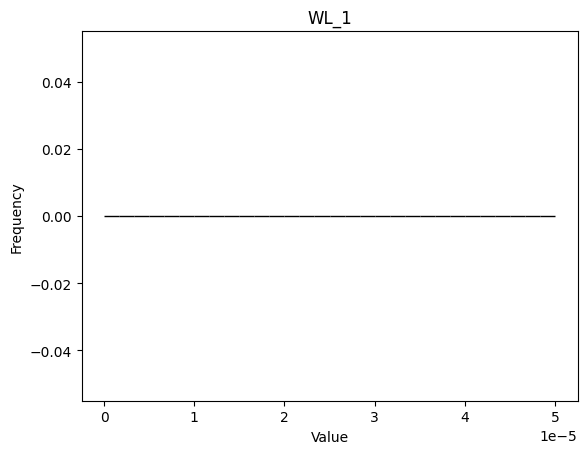

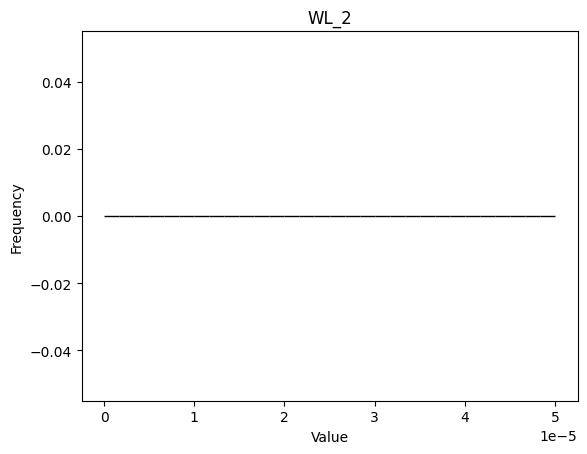

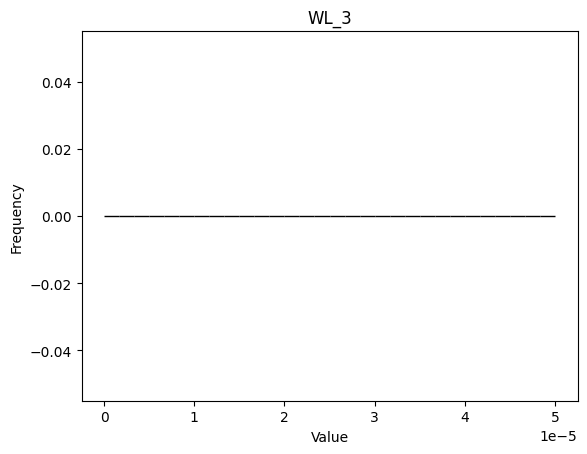

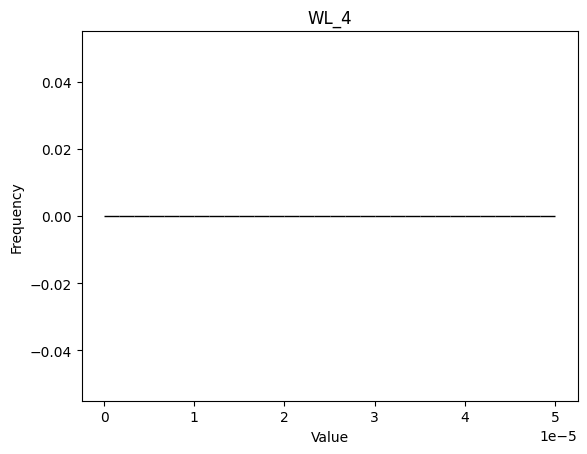

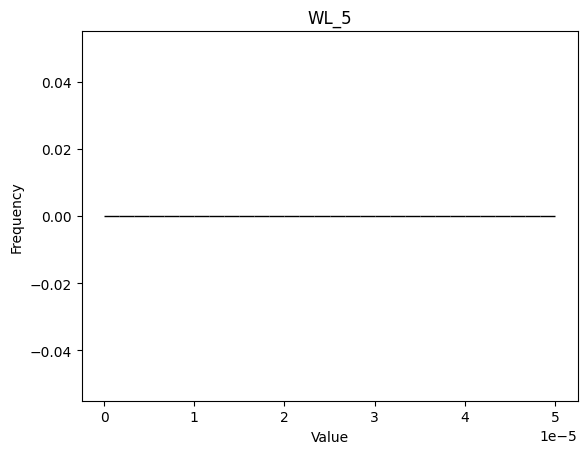

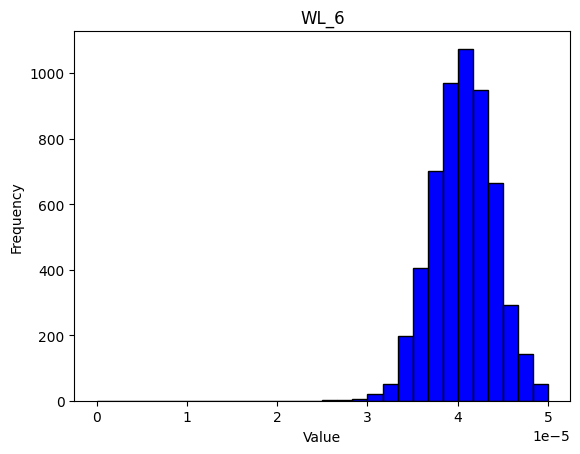

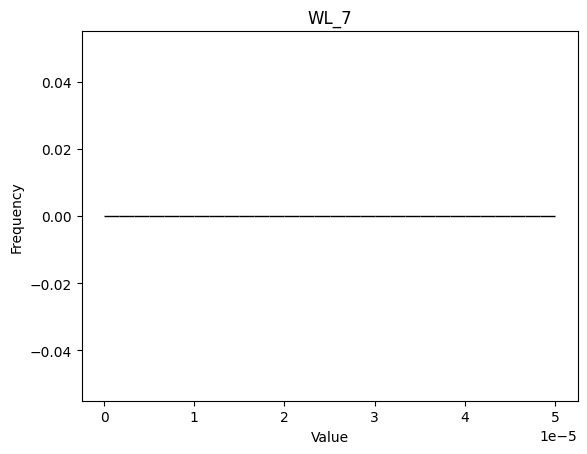

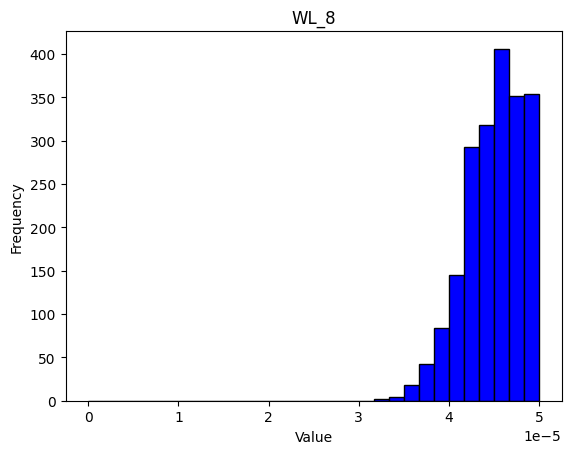

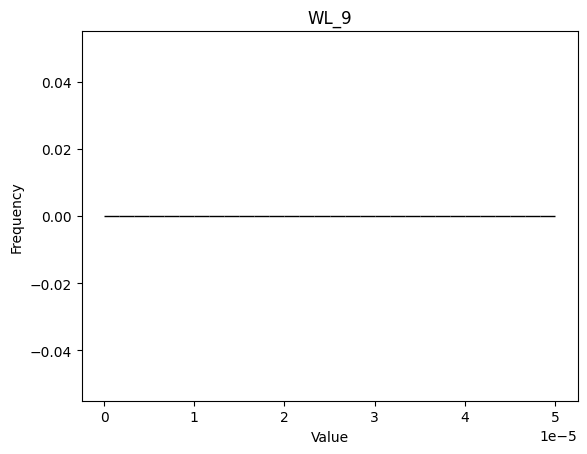

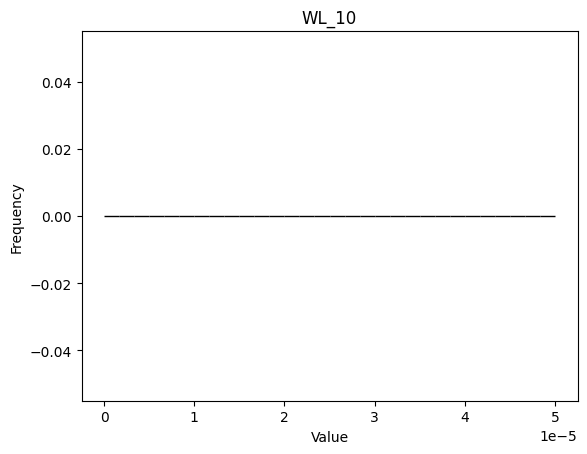

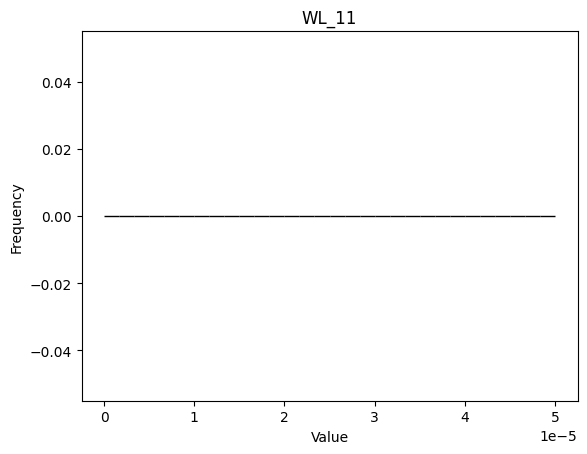

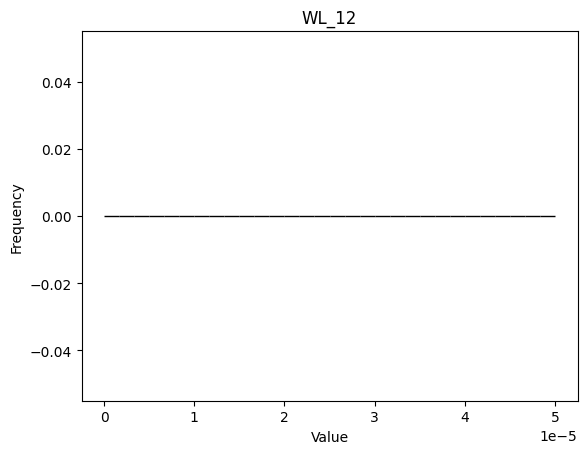

In [ ]:
columnas = list(db.columns)
for value in columnas[9:]:
  plt.hist(dbF5[value], bins=30, color='blue', edgecolor='black', range=(0,0.00005))
  plt.title(value)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
columns = ['Finger_4']
columns.extend(mav_to_wl_columns)
dbcorr_filtered = dbF5.loc[:,columns]
dbpair = dbcorr_filtered.loc[1:10, 'WL_3':'WL_6']
dbcorr = dbcorr_filtered.corr()
dbcorr

,Finger_4,MAVs_1,MAVs_2,MAVs_3,MAVs_4,MAVs_5,MAVs_6,MAVs_7,MAVs_8,MAVs_9,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
Finger_4,1.000000,0.168924,0.423924,0.358476,0.290323,0.291579,0.084198,0.157754,0.429795,0.351417,...,0.405871,0.452794,0.355857,0.079961,0.072201,0.423519,0.407608,0.206776,0.000391,0.212331
MAVs_1,0.168924,1.000000,0.324664,0.261412,0.380216,0.148760,0.046543,0.396740,0.238916,0.223073,...,0.270973,0.242952,0.211408,0.031768,0.163688,0.292672,0.239391,0.206924,0.022394,0.093891
MAVs_2,0.423924,0.324664,1.000000,0.636358,0.433424,0.449134,0.188250,0.213660,0.409393,0.558944,...,0.649779,0.634414,0.498259,0.141200,0.078777,0.446029,0.582001,0.375635,0.037124,0.327088
MAVs_3,0.358476,0.261412,0.636358,1.000000,0.465408,0.426890,0.103598,0.165537,0.347023,0.718083,...,0.959636,0.601677,0.453770,0.064649,0.057513,0.373576,0.755892,0.295302,0.014884,0.441372
MAVs_4,0.290323,0.380216,0.433424,0.465408,1.000000,0.347301,0.035245,0.327816,0.249656,0.505101,...,0.484632,0.700091,0.410392,0.015741,0.128592,0.271089,0.531279,0.215388,0.021047,0.259460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WL_8,0.423519,0.292672,0.446029,0.373576,0.271089,0.266843,0.123236,0.232433,0.951016,0.332459,...,0.388284,0.352885,0.322037,0.080885,0.096827,1.000000,0.363739,0.379849,0.015552,0.277601
WL_9,0.407608,0.239391,0.582001,0.755892,0.531279,0.497922,0.153597,0.221061,0.342110,0.909165,...,0.745617,0.694756,0.532949,0.117267,0.099945,0.363739,1.000000,0.313841,-0.001870,0.388793
WL_10,0.206776,0.206924,0.375635,0.295302,0.215388,0.266428,0.174973,0.278969,0.376828,0.309360,...,0.304140,0.270914,0.275840,0.133104,0.173713,0.379849,0.313841,1.000000,-0.021863,0.157462
WL_11,0.000391,0.022394,0.037124,0.014884,0.021047,0.049347,-0.016738,0.000510,0.009487,0.035387,...,0.016495,0.005506,0.031247,-0.013714,0.001325,0.015552,-0.001870,-0.021863,1.000000,-0.008027


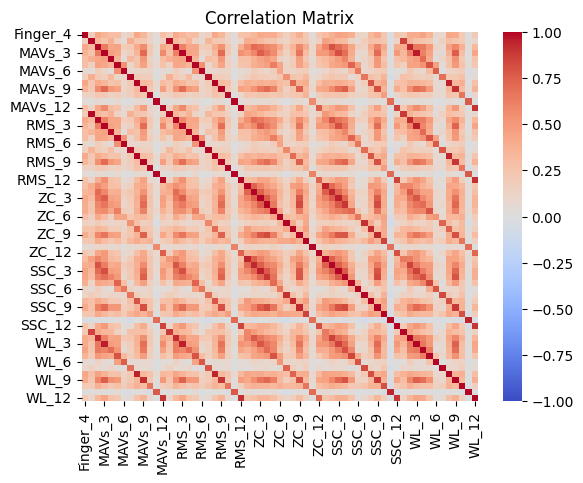

In [ ]:
import seaborn as sns

sns.heatmap(dbcorr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

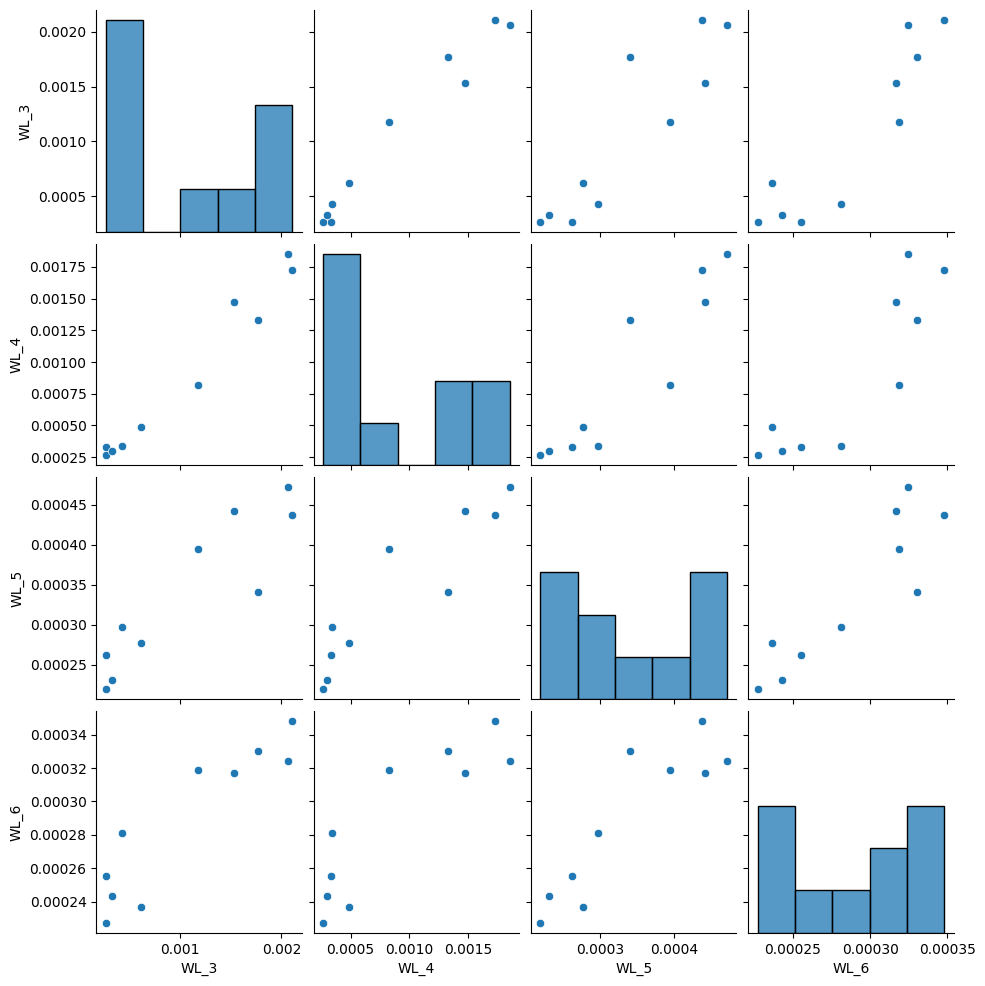

In [ ]:
sns.pairplot(dbpair)
plt.show()